## quiz-1



**This is a practice quiz from a previous year. This would have been given in class, and you would have 20-25 minutes to complete it. You must work alone, and turn in only your original work.**

The shear stress constant $C$ is a function of the collective variable $Re \alpha$ in this figure (Fig 3-33 in Viscous Fluid Flow, 3rd ed. by Frank White):

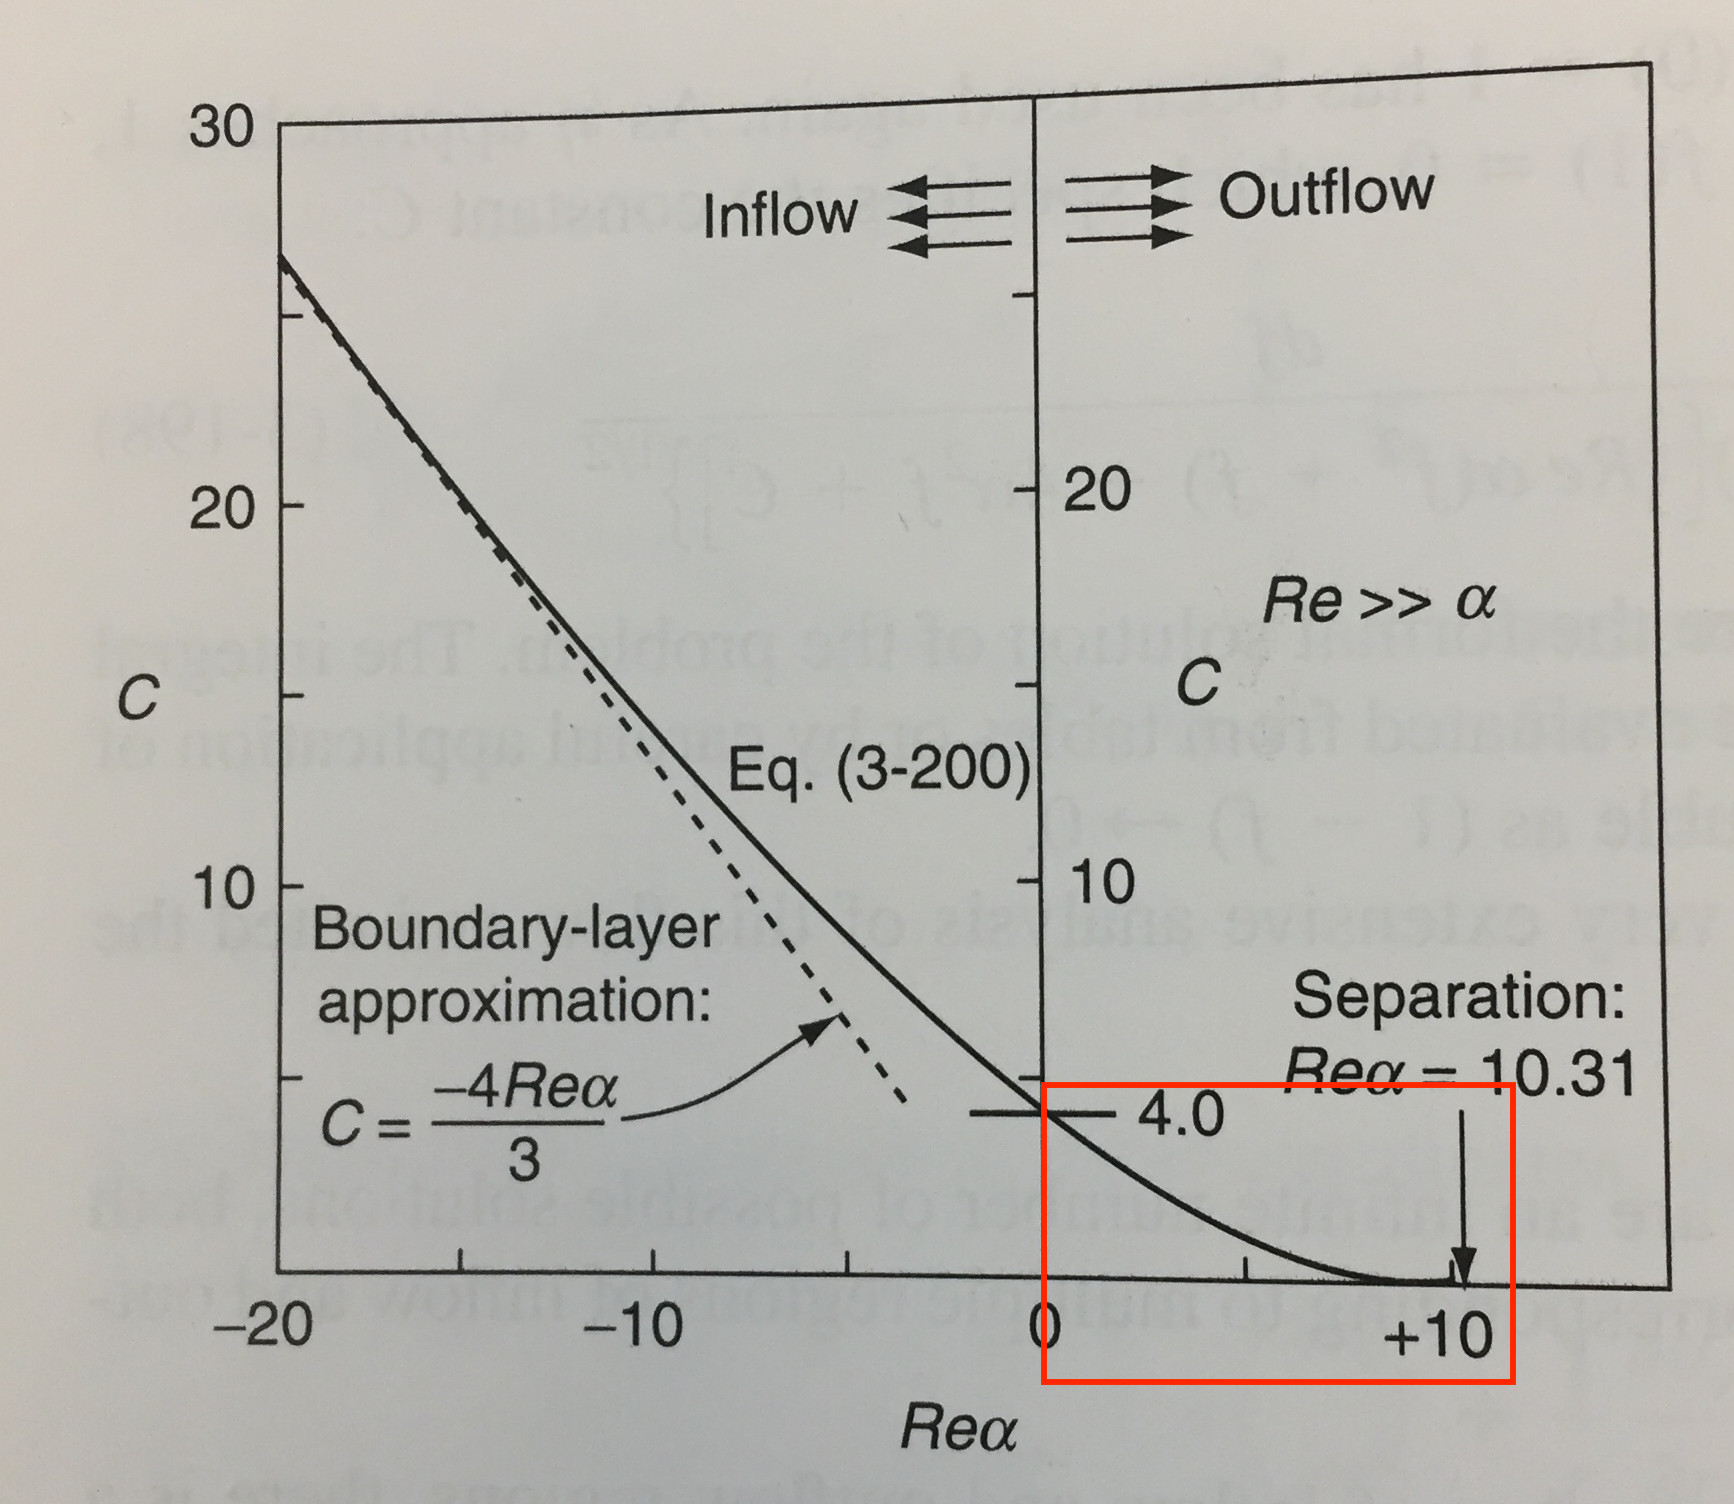

$C$ is derived from this integral:

$\left(\frac{2 Re\alpha}{3}\right)^{1/2} = \int_0^1 \frac{df}{[(1 - f)(f^2 + f + K)]^{1/2}}$

where $K = 3C / (2 Re\alpha)$. You goal in this problem is to create the figure
above for the region inside the red box. The key to finding $C$ is to first
specify a numeric value for $K$, evaluate the integral on the right hand side,
then solve for $Re \alpha$ from the left hand side, and finally, solve for $C$
using the numeric value of $K$ and the definition of $K$.

Use the information above to solve for $C$ as a function of $Re \alpha$. First, define a function:

$g(K) =  \int_0^1 \frac{df}{[(1 - f)(f^2 + f + K)]^{1/2}}$

and use it to create an array of values of $g(K)$ for $K$ in the range of 0 to 200.



Next, solve the equation $\left(\frac{2 Re\alpha}{3}\right)^{1/2} = g(K)$ for the values of $Re \alpha$. There will be one $Re \alpha$ for each value in $K$.



Next, using the relation $K = 3C / (2 Re\alpha)$, solve for $C$. You will have one $C$ for each value in $K$.



Finally, make a plot of $C$ vs $Re \alpha$ here. Compare your result to the result in the red box and discuss any differences.



### solution



The key to this problem is recognizing you need to evaluate an integral that is defined by a function. The function (the integrand) has a parameter in it (K), so you must either define the integrand as a function inside a function, or use a parameter argument. Here, I define it inside a function. Then, create an array of K values, and iterate over it to get g(K). It is not critical to print g(K) here, but it does help see that there are no inf, nan, or other weird things happening in your function.



In [1]:
import numpy as np
from scipy.integrate import quad


def g(k):
    def integrand(f):
        return 1 / np.sqrt((1 - f) * (f**2 + f + k))

    I, err = quad(integrand, 0, 1)
    return I

K = np.linspace(0, 200)

gK = np.zeros(K.shape)

for i, k in enumerate(K):
    gK[i] = g(k)

gK

# Out [1]:
# text/plain
array([2.62205755, 0.87536997, 0.65479423, 0.54592169, 0.47797388,
       0.43039464, 0.39468683, 0.36661205, 0.34378759, 0.32475721,
       0.308574  , 0.29459204, 0.28235359, 0.27152397, 0.26185208,
       0.25314529, 0.24525308, 0.23805586, 0.23145727, 0.22537866,
       0.21975515, 0.21453263, 0.20966561, 0.2051155 , 0.20084933,
       0.19683876, 0.19305923, 0.18948938, 0.18611052, 0.1829062 ,
       0.17986189, 0.1769647 , 0.17420315, 0.17156698, 0.16904698,
       0.16663486, 0.16432313, 0.16210502, 0.15997438, 0.1579256 ,
       0.15595358, 0.15405363, 0.15222147, 0.15045317, 0.14874509,
       0.1470939 , 0.14549651, 0.14395005, 0.14245188, 0.14099953])

You can use simple algebra to compute Realpha. It is not necessary to use fsolve here.



In [1]:
Realpha = gK**2 * 3 / 2

# Out [2]:

And again simple algebra to compute C.



In [1]:
C = K * Realpha * 2 / 3

# Out [3]:

Finally, make the plot:



# Out [4]:
# text/plain
Text(0, 0.5, 'C')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

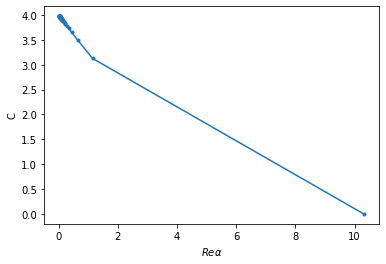

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Realpha, C, '.-')
plt.xlabel('$Re\\alpha$')
plt.ylabel('C')

When asked to compare and discuss differences, you need to note if there are any differences, and then discuss what is the cause of them. This graph does *not* look like the figure we are trying to reproduce. The point at Re&alpha;=0 looks correct, and the point near Re&alpha;=10.31 looks correct, but there is a straight line from about 1 to 10 that is not like the figure. That is because there is not data calculated in this region, so the straight line is misleading. You can confirm that by using more points in the K range.

You can see from here we do not have a lot of data between Re&alpha;=1 to 10, so the graph appears to be a straight line there. Evidently the first 49 points are concentrated from 0 to 1. You can make the plot a lot smoother by adding more points to the K array. It was not necessary to do that for this quiz, but you had to recognize the problem.

It is not obvious where you need all the points though. The relationship from K to Re&alpha; to C is not a linear one. Let's look at the first few points:



In [1]:
for i in range(3):
    print(f'K={K[i]:1.1f} Realpha={Realpha[i]:1.1f}, C={C[i]}')

# Out [5]:
# output
K=0.0 Realpha=10.3, C=0.0
K=4.1 Realpha=1.1, C=3.127643201519589
K=8.2 Realpha=0.6, C=3.5000447809890454

This indicates that the big gap in data is between K=0 and K=4. The rest of the range is covered pretty well. There are many ways to create a better grid other than using a very large number of points. We could make a log-spaced grid, which will spread the points out more reasonably.



# Out [6]:
# text/plain
(0, 4)

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

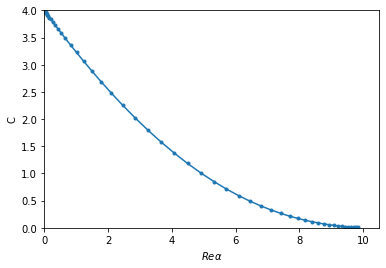

In [1]:
logK = np.linspace(np.log(0.001), np.log(200))

K = np.exp(logK)

gK = np.zeros(K.shape)

for i, k in enumerate(K):
    gK[i] = g(k)

Realpha = gK**2 * 3 / 2

C = K * Realpha * 2 / 3

plt.plot(Realpha, C, '.-')
plt.xlabel('$Re\\alpha$')
plt.ylabel('C')
plt.xlim([0, 10.5])
plt.ylim([0, 4])

You can also just use *a lot* of points, but you can see we have to use nearly 100 times more points than the log-spaced grid above, and this takes noticeably longer to run.



# Out [7]:
# text/plain
(0, 4)

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

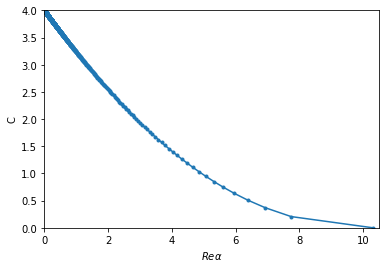

In [1]:
K = np.linspace(0, 200, 5000)

gK = np.zeros(K.shape)

for i, k in enumerate(K):
    gK[i] = g(k)

Realpha = gK**2 * 3 / 2

C = K * Realpha * 2 / 3

plt.plot(Realpha, C, '.-')
plt.xlabel('$Re\\alpha$')
plt.ylabel('C')
plt.xlim([0, 10.5])
plt.ylim([0, 4])

#### General comments



1.  You should focus most of your effort on getting a technically correct answer. This is 90% of your grade. If you can't get to it, then make sure it is clear to me what you were trying to do. You should do this in text though, since your code wasn't working. After you have something that works, you should make sure it is easy to follow, and presented appropriately.
2.  I do not expect you to do something I have not shown you already, so fsolve is not necessary for the first exam. I don't mind if you use it, but it is surely more complicated than what I had in mind. If you find yourself doing something complex, you should ask yourself if you are on the right track. Complex takes more time than simple.
3.  If you found yourself flipping through the notes looking for a similar example to solve this, you are not prepared for the exam. You should recognize this is a problem to solve by quad, and from that know to create a function for the integrand, and then a loop to solve the integral many times. You could make yourself a cheatsheet with *brief* summaries of syntax and an example problem for the main things we have done so far. This sheet should *summarize* the notes in short form.
4.  If the problem says compare/discuss, you need to do this in more than one sentence. It is not sufficient to simply note differences or features, without noting why they are or aren't important, what they are due to, etc. I cannot guess what you are thinking if you don't tell me.

